In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import scipy.stats as stats

#### Import Data

In [3]:
df = pd.read_csv('loan_data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


### Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [6]:
df.isna().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.dropna(inplace = True)

In [8]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
df.duplicated().sum()

0

### EDA

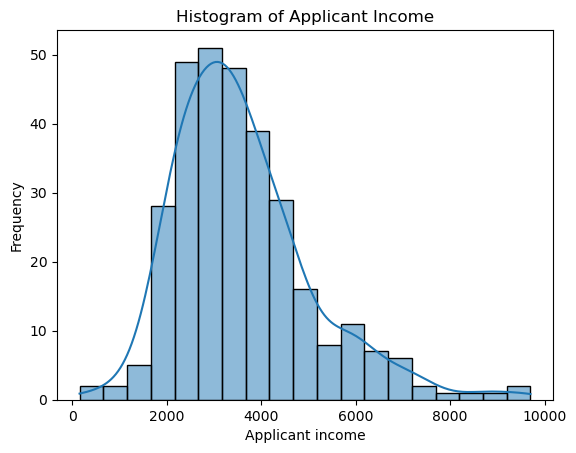

In [11]:
sns.histplot(df['ApplicantIncome'], kde=True)
plt.title("Histogram of Applicant Income")
plt.xlabel("Applicant income")
plt.ylabel("Frequency")
plt.show()

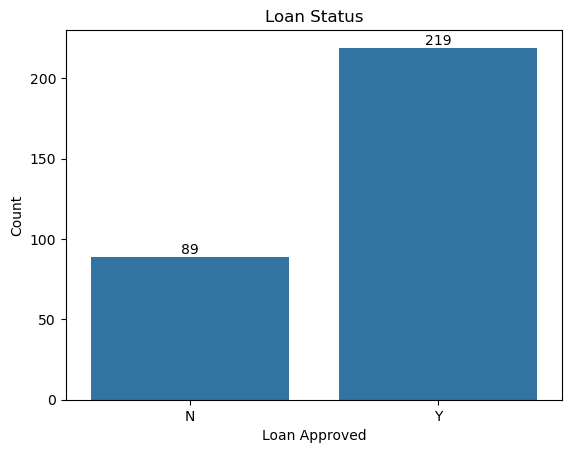

In [12]:
ax = sns.countplot(x="Loan_Status", data =df)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Loan Status")
plt.xlabel("Loan Approved")
plt.ylabel("Count")
plt.show()

In [13]:
avg_loan_amount_by_education = df.groupby("Education")["LoanAmount"].mean().reset_index()
avg_loan_amount_by_education

,Education,LoanAmount
0,Graduate,105.344978
1,Not Graduate,102.531646


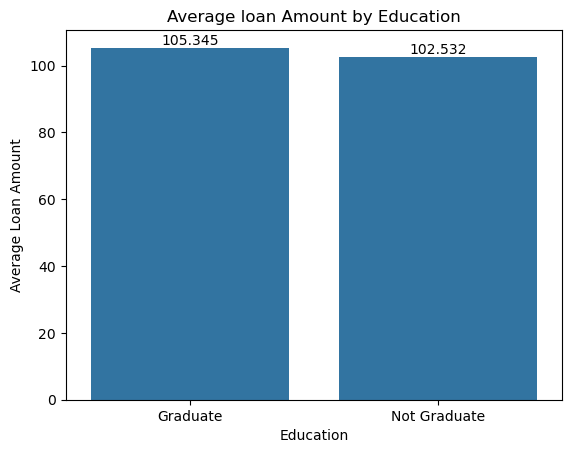

In [14]:
ax = sns.barplot(x="Education", y= "LoanAmount", data = avg_loan_amount_by_education)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Average loan Amount by Education")
plt.xlabel("Education")
plt.ylabel("Average Loan Amount")
plt.show()

In [15]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

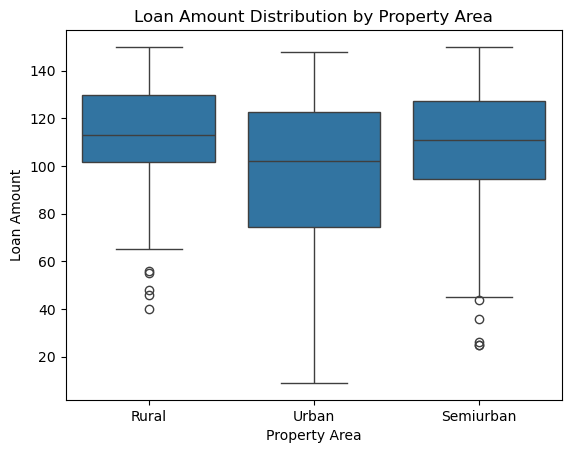

In [16]:
sns.boxplot(x="Property_Area", y = "LoanAmount", data = df)
plt.title("Loan Amount Distribution by Property Area")
plt.xlabel("Property Area")
plt.ylabel("Loan Amount")
plt.show()

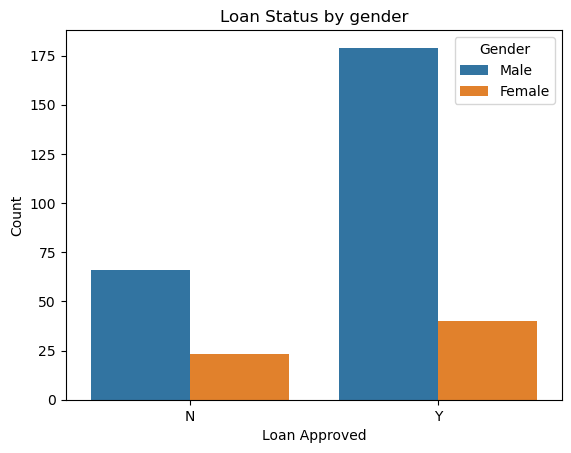

In [17]:
sns.countplot(x = "Loan_Status", hue = "Gender", data = df)
plt.title("Loan Status by gender")
plt.xlabel("Loan Approved")
plt.ylabel("Count")
plt.show()

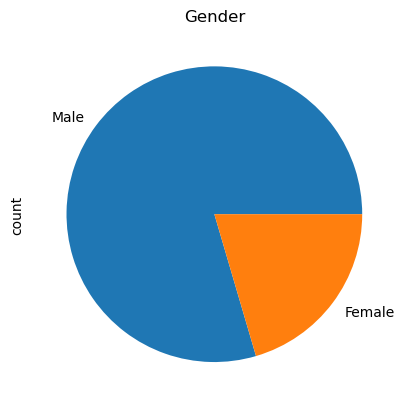

In [18]:
df["Gender"].value_counts().plot(kind='pie')
plt.title("Gender")
plt.show()

In [19]:
loan_status_by_married = df.groupby("Married")["Loan_Status"].value_counts().unstack()

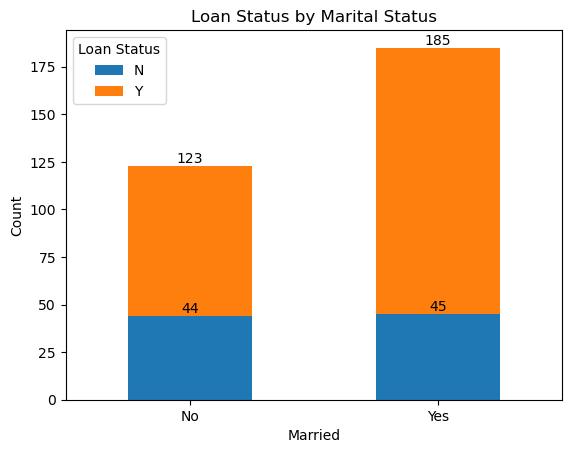

In [20]:
ax = loan_status_by_married.plot(kind="bar", stacked = True)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Loan Status by Marital Status")
plt.xlabel("Married")
plt.ylabel("Count")
plt.legend(title="Loan Status")
plt.xticks(rotation=0)
plt.show()

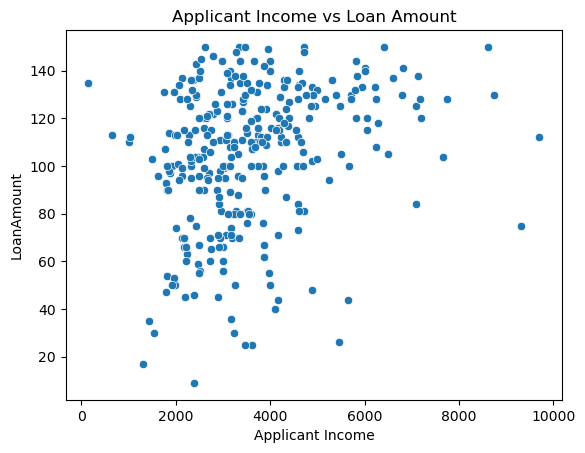

In [21]:
sns.scatterplot(x = "ApplicantIncome", y = "LoanAmount", data = df)
plt.title("Applicant Income vs Loan Amount")
plt.xlabel("Applicant Income")
plt.show()

In [22]:
numeric_df = df.select_dtypes(include = ["int64", "float64"])

In [23]:
correlaction_matrix = numeric_df.corr()
correlaction_matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.243677,0.267628,-0.099571,0.030307
CoapplicantIncome,-0.243677,1.000000,0.123028,-0.004158,0.012715
LoanAmount,0.267628,0.123028,1.000000,0.135069,-0.043853
Loan_Amount_Term,-0.099571,-0.004158,0.135069,1.000000,0.015269
Credit_History,0.030307,0.012715,-0.043853,0.015269,1.000000


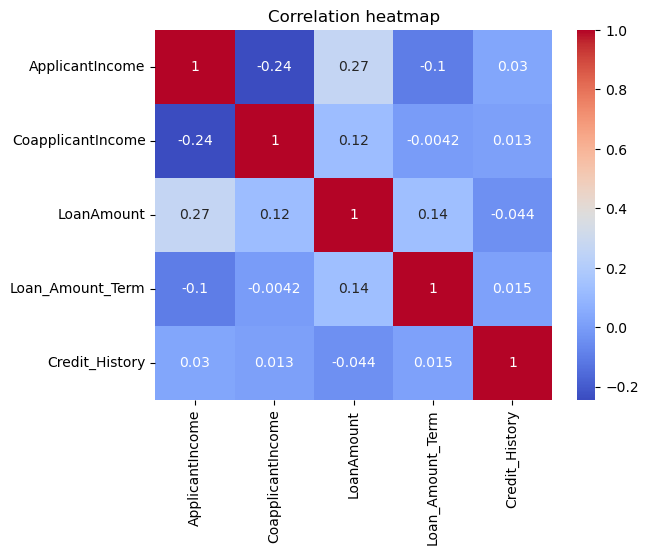

In [24]:
sns.heatmap(correlaction_matrix, annot = True, cmap = 'coolwarm')
plt.title("Correlation heatmap")
plt.show()

In [25]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [26]:
avg_loan_term_by_employed = df.groupby("Self_Employed")["Loan_Amount_Term"].mean().reset_index()
avg_loan_term_by_employed

,Self_Employed,Loan_Amount_Term
0,No,342.3
1,Yes,330.0


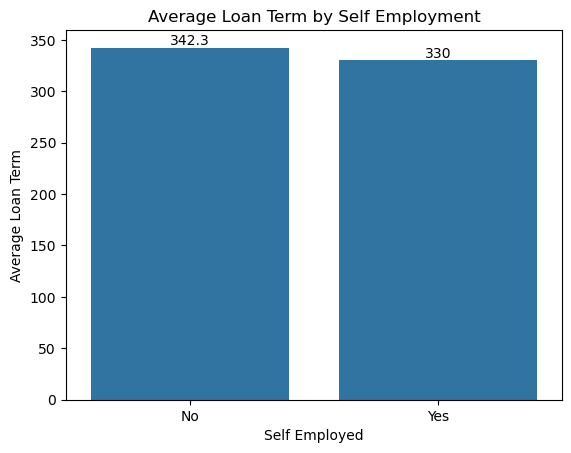

In [27]:
ax = sns.barplot(x = "Self_Employed", y = "Loan_Amount_Term", data = avg_loan_term_by_employed)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Average Loan Term by Self Employment")
plt.xlabel("Self Employed")
plt.ylabel("Average Loan Term")
plt.show()


### Feature Selection

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 308 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            308 non-null    object 
 1   Gender             308 non-null    object 
 2   Married            308 non-null    object 
 3   Dependents         308 non-null    object 
 4   Education          308 non-null    object 
 5   Self_Employed      308 non-null    object 
 6   ApplicantIncome    308 non-null    int64  
 7   CoapplicantIncome  308 non-null    float64
 8   LoanAmount         308 non-null    float64
 9   Loan_Amount_Term   308 non-null    float64
 10  Credit_History     308 non-null    float64
 11  Property_Area      308 non-null    object 
 12  Loan_Status        308 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 33.7+ KB


In [30]:
from scipy.stats import chi2_contingency, pointbiserialr

significance_level = 0.05  # 5% threshold

# Convert Loan_Status to binary 0 = N, 1 = Y
df['Loan_Status_Binary'] = df['Loan_Status'].map({'N': 0, 'Y': 1})

# ==============================
# Categorical Features - Chi-Square Test
# ==============================
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']
chi_square_results = {}

for col in categorical_features:
    contingency_table = pd.crosstab(df[col], df['Loan_Status_Binary'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    chi_square_results[col] = p_value

chi_square_df = pd.DataFrame(list(chi_square_results.items()), columns=['Feature', 'P-Value'])
chi_square_df['Significant'] = chi_square_df['P-Value'] < significance_level


# ==============================
# Numerical Features - Point Biserial Correlation
# ==============================
numerical_features = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
corr_results = {}

for col in numerical_features:
    clean_df = df[[col, 'Loan_Status_Binary']].dropna()
    
    corr, p_value = pointbiserialr(clean_df[col], clean_df['Loan_Status_Binary'])
    corr_results[col] = [corr, p_value]

corr_df = pd.DataFrame(corr_results, index=['Correlation', 'P-Value']).T
corr_df['Significant'] = corr_df['P-Value'] < significance_level


# ==============================
# Display Output
# ==============================
print("\n🔥 Chi-Square Test Results (Categorical → Loan_Status)")
display(chi_square_df)

print("\n📊 Point Biserial Correlation Results (Numerical → Loan_Status)")
display(corr_df)



🔥 Chi-Square Test Results (Categorical → Loan_Status)


,Feature,P-Value,Significant
0,Gender,1.806869e-01,False
1,Married,4.110144e-02,True
2,Dependents,8.639684e-01,False
3,Education,4.417877e-01,False
4,Self_Employed,5.377922e-01,False
5,Property_Area,4.228578e-03,True
6,Credit_History,3.599469e-24,True



📊 Point Biserial Correlation Results (Numerical → Loan_Status)


,Correlation,P-Value,Significant
ApplicantIncome,0.033927,0.553071,False
CoapplicantIncome,-0.001546,0.978440,False
LoanAmount,0.053104,0.352977,False
Loan_Amount_Term,-0.009547,0.867466,False


In [31]:
df.columns.to_list()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status',
 'Loan_Status_Binary']

### Feature Engineering

In [33]:
x = df[['Married', 'ApplicantIncome', 'Property_Area', 'LoanAmount', 'Credit_History']]
y = df[['Loan_Status']]

In [34]:
y

,Loan_Status
0,N
1,Y
2,Y
3,Y
4,Y
...,...
376,Y
377,Y
378,Y
379,Y


In [35]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()

In [36]:
y['Loan_Status'] = labelencoder.fit_transform(y['Loan_Status'])

C:\Users\zuhairi\AppData\Local\Temp\ipykernel_30272\3706250552.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Loan_Status'] = labelencoder.fit_transform(y['Loan_Status'])


In [37]:
y

,Loan_Status
0,0
1,1
2,1
3,1
4,1
...,...
376,1
377,1
378,1
379,1


In [38]:
x

,Married,ApplicantIncome,Property_Area,LoanAmount,Credit_History
0,Yes,4583,Rural,128.0,1.0
1,Yes,3000,Urban,66.0,1.0
2,Yes,2583,Urban,120.0,1.0
3,No,6000,Urban,141.0,1.0
4,Yes,2333,Urban,95.0,1.0
...,...,...,...,...,...
376,Yes,5703,Urban,128.0,1.0
377,Yes,3232,Rural,108.0,1.0
378,No,2900,Rural,71.0,1.0
379,Yes,4106,Rural,40.0,1.0


In [39]:
labelencoder.classes_

array(['N', 'Y'], dtype=object)

In [40]:
x['Married'] = labelencoder.fit_transform(x['Married'])


C:\Users\zuhairi\AppData\Local\Temp\ipykernel_30272\34633452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Married'] = labelencoder.fit_transform(x['Married'])


In [41]:
x['Property_Area'] = labelencoder.fit_transform(x['Property_Area'])

C:\Users\zuhairi\AppData\Local\Temp\ipykernel_30272\1835689105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Property_Area'] = labelencoder.fit_transform(x['Property_Area'])


In [42]:
x

# 0 3500 1 100 1 

,Married,ApplicantIncome,Property_Area,LoanAmount,Credit_History
0,1,4583,0,128.0,1.0
1,1,3000,2,66.0,1.0
2,1,2583,2,120.0,1.0
3,0,6000,2,141.0,1.0
4,1,2333,2,95.0,1.0
...,...,...,...,...,...
376,1,5703,2,128.0,1.0
377,1,3232,0,108.0,1.0
378,0,2900,0,71.0,1.0
379,1,4106,0,40.0,1.0


In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [44]:
x = scaler.fit_transform(x)

In [45]:
x

array([[ 0.81539246,  0.67389339, -1.34675568,  0.79689813,  0.41364557],
       [ 0.81539246, -0.41036528,  1.23767266, -1.31665281,  0.41364557],
       [ 0.81539246, -0.6959849 ,  1.23767266,  0.52418188,  0.41364557],
       ...,
       [-1.22640329, -0.47885919, -1.34675568, -1.14620515,  0.41364557],
       [ 0.81539246,  0.34717742, -1.34675568, -2.20298062,  0.41364557],
       [-1.22640329,  0.67389339, -0.05454151,  0.96734579, -2.41752858]])

In [46]:
import joblib
joblib.dump(scaler, 'Scaler.pkl')

['Scaler.pkl']

### Training Machine Learning

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
def modelperformance(predictions):
    print("Accuracy score in model is {}".format(accuracy_score(y_test,predictions)))

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

C:\Users\zuhairi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [53]:
log_predictions = log_model.predict(x_test)
log_predictions

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [54]:
modelperformance(log_predictions)

Accuracy score in model is 0.8064516129032258


In [55]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = {"n_neighbors" : [3,5,7,8,6],
             "weights" : ["uniform", "distance"]}
gridkn = GridSearchCV(KNeighborsClassifier(), param_grid)
gridkn.fit(x_train, y_train.values.ravel())

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 8, 6],
                         'weights': ['uniform', 'distance']})

In [56]:
gridkn.best_params_

{'n_neighbors': 7, 'weights': 'uniform'}

In [57]:
knpreds = gridkn.predict(x_test)

In [58]:
modelperformance(knpreds)

Accuracy score in model is 0.8064516129032258


In [59]:
from sklearn.svm import SVC

In [60]:
svm = SVC()
param_grid_svc = {"C": [0.01,0.1,0.5], "kernel":["linear","rbf","poly"]}

In [61]:
gridsvc = GridSearchCV(svm, param_grid_svc)

In [62]:
gridsvc.fit(x_train,y_train.values.ravel())

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5],
                         'kernel': ['linear', 'rbf', 'poly']})

In [63]:
pred_svc = gridsvc.predict(x_test)
modelperformance(pred_svc)

Accuracy score in model is 0.8064516129032258


In [64]:
joblib.dump(gridsvc, "model.pkl")

['model.pkl']

In [65]:
x

array([[ 0.81539246,  0.67389339, -1.34675568,  0.79689813,  0.41364557],
       [ 0.81539246, -0.41036528,  1.23767266, -1.31665281,  0.41364557],
       [ 0.81539246, -0.6959849 ,  1.23767266,  0.52418188,  0.41364557],
       ...,
       [-1.22640329, -0.47885919, -1.34675568, -1.14620515,  0.41364557],
       [ 0.81539246,  0.34717742, -1.34675568, -2.20298062,  0.41364557],
       [-1.22640329,  0.67389339, -0.05454151,  0.96734579, -2.41752858]])

In [66]:
import joblib
testmodel = joblib.load('model.pkl')

In [67]:
# 0 3500 1 100 1 

In [68]:
testmodel.predict([[0,3500,1,100,1]])[0]

1